In [1]:
import sys
sys.path.append('/Users/paolamartire/shocks')

import numpy as np
import matplotlib.pyplot as plt

from grid_maker import make_grid
from Utilities.operators import calc_div, calc_grad, zero_interpolator

In [2]:
gamma = 5/3
mach_min = 1.3
num = 45

In [3]:
gridded_indexes, gridded_den, gridded_T, gridded_P, gridded_Vx, gridded_Vy, gridded_Vz, gridded_V, gridded_Rcell, x_radii, y_radii, z_radii = make_grid(num)

all T=0, bro. CHANGE!
Tree built!


In [4]:
# TEST shock direction
gradx_delta = []
grady_delta = []
X_cell = []
Y_cell = []
idx_slice = 24
for i in range(1, len(x_radii)-1):
    for j in range(1,len(y_radii)-1):
        for k in range(idx_slice,idx_slice+1):
            idx = [i,j,k]
            grad =  calc_grad(x_radii, y_radii, z_radii, gridded_T, idx, kind_info = 'idx')
            gradx_delta.append(grad[0])
            grady_delta.append(grad[1])
            X_cell.append(x_radii[i])
            Y_cell.append(y_radii[j])

In [5]:
flat_T = gridded_T[:,:,idx_slice]
T_plot = np.log10(flat_T)
T_plot = np.nan_to_num(T_plot, neginf = 0)

In [6]:
X_cell = np.array(X_cell)
Y_cell = np.array(Y_cell)
gradx_delta = np.array(gradx_delta)
grady_delta = np.array(grady_delta)

In [19]:
ending_arrowx = X_cell + gradx_delta
ending_arrowy = Y_cell + grady_delta

0.044444444444444446


Text(0.5, 1.0, 'Temperature slice, z=0.091  $N_{cell}$= 45')

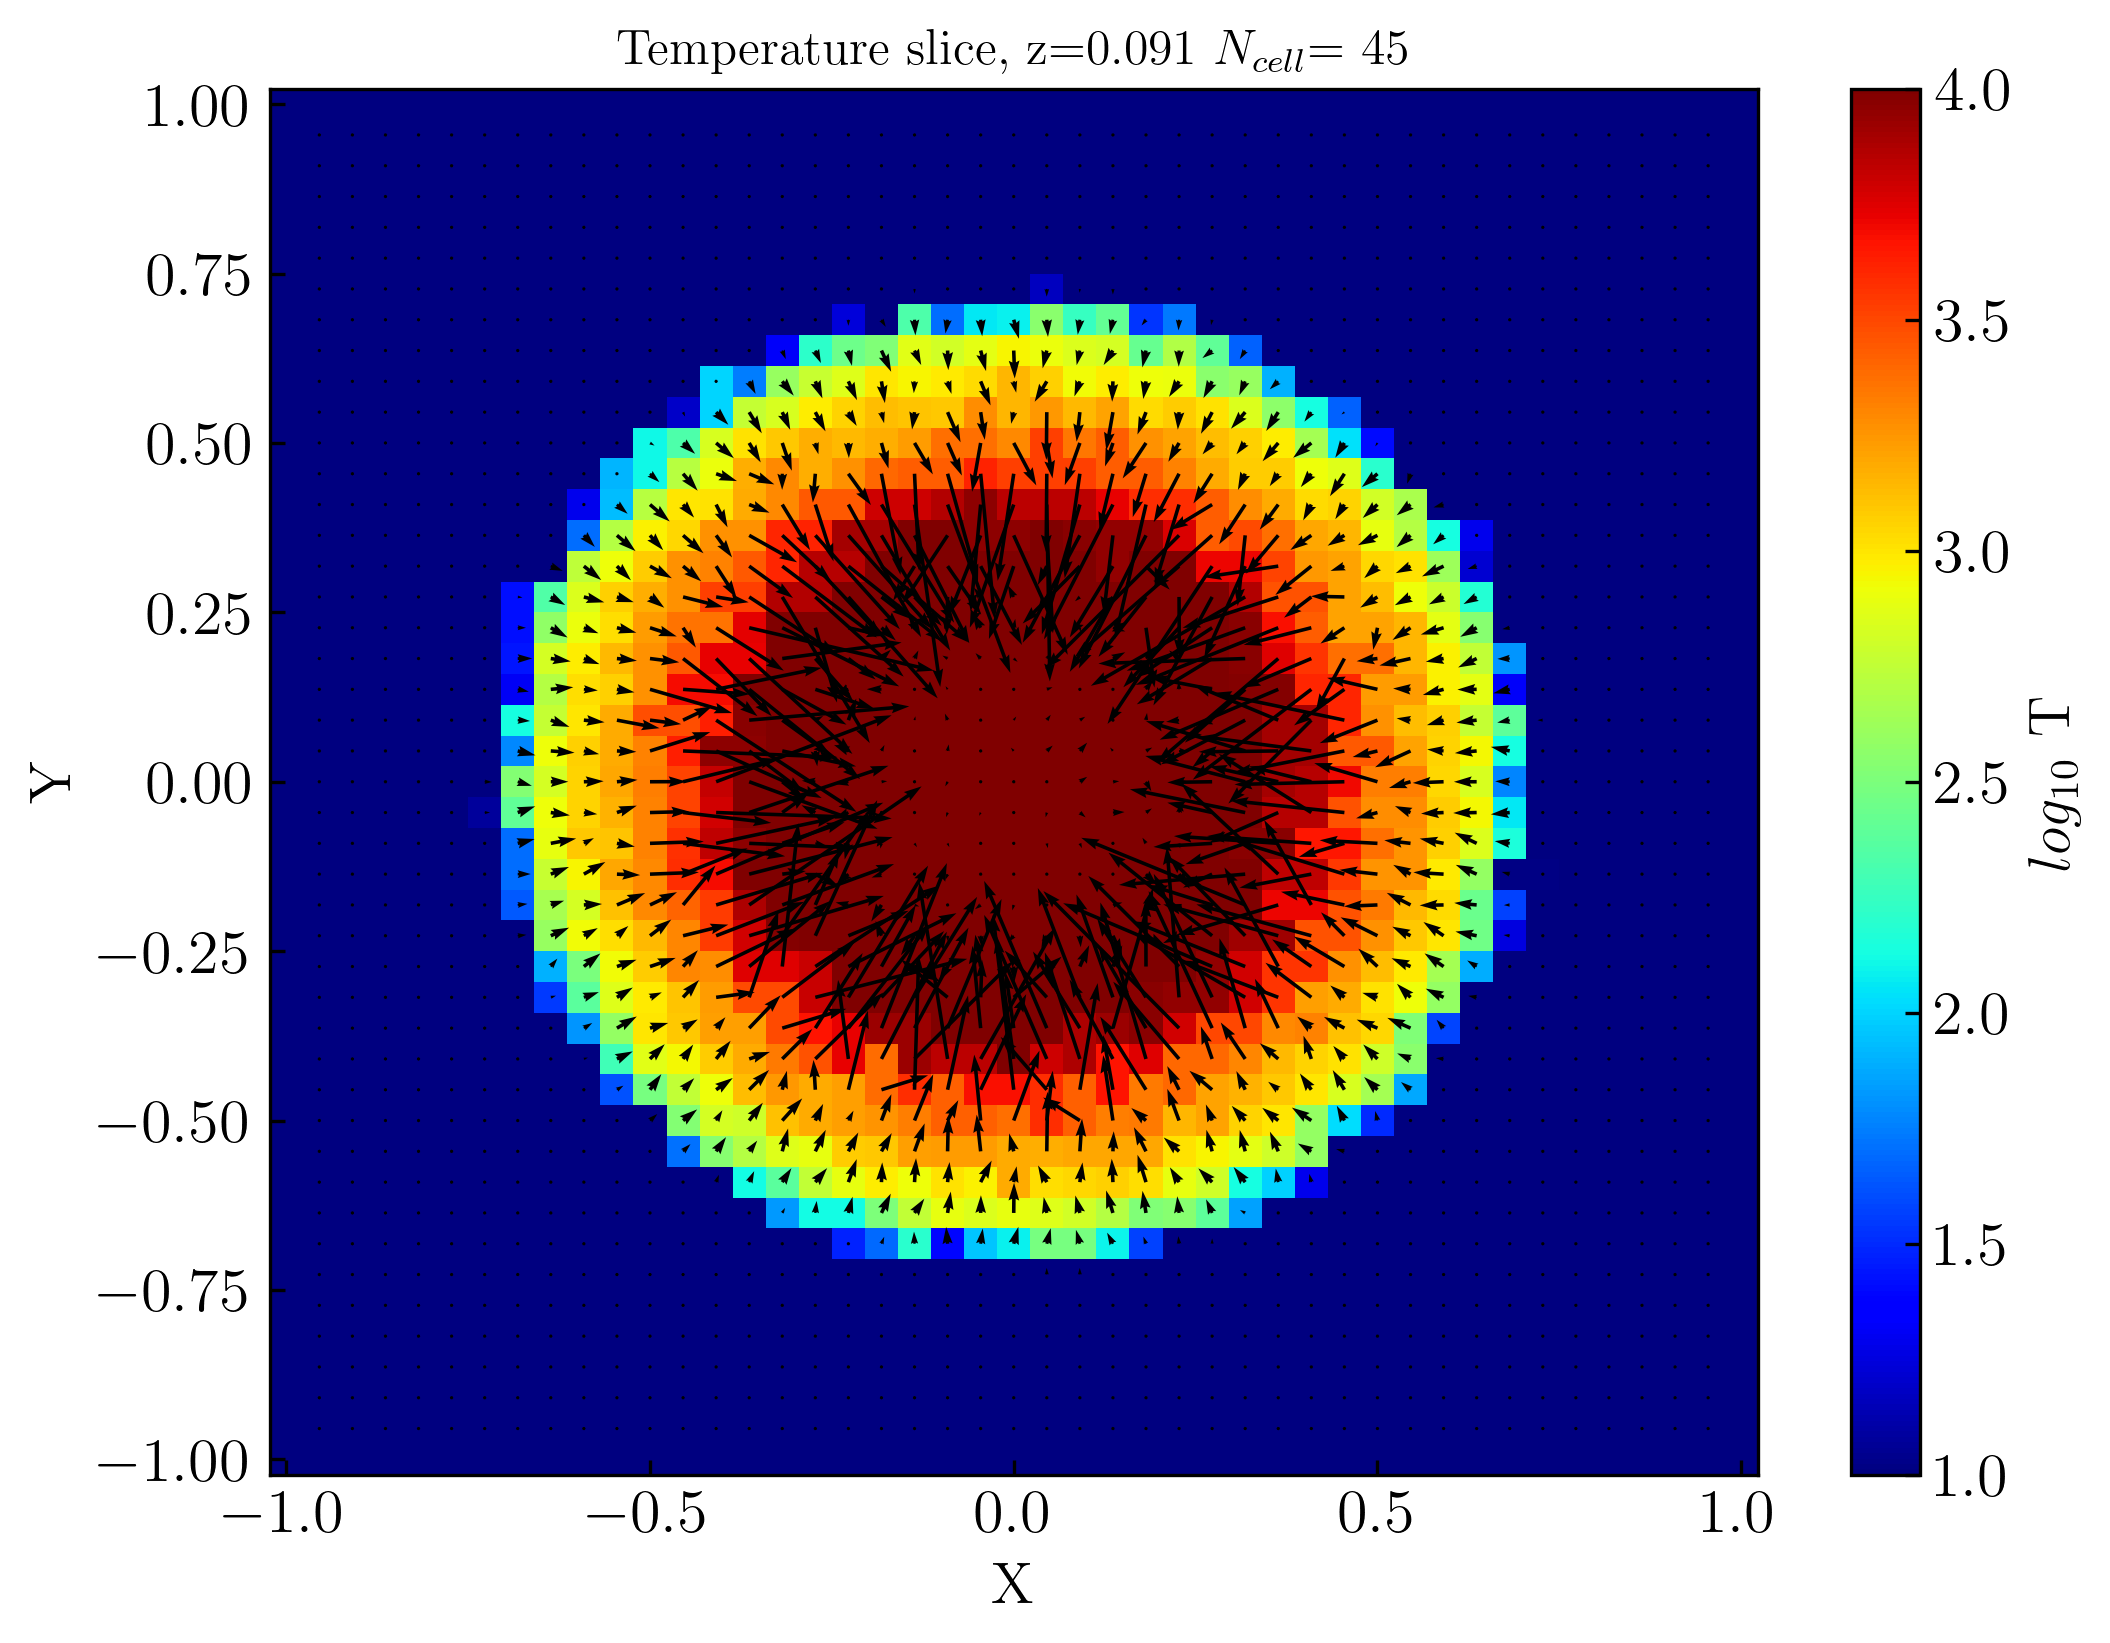

In [20]:
# Gradient T
z_chosen = np.round(z_radii[idx_slice],3)
fig, ax = plt.subplots(1,1)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
img = ax.pcolormesh(x_radii, y_radii, T_plot.T, cmap = 'jet')
cb = plt.colorbar(img)
cb.set_label(r'$log_{10}$ T', fontsize = 14)
ax.quiver(X_cell, Y_cell, ending_arrowx, ending_arrowy, color = 'k')# arrow_length_ratio=0.1, color = 'k')
plt.title(f'Temperature slice, z={z_chosen} ' + r' $N_{cell}$'+ f'= {num}')
#plt.savefig(f'Figs/Tslice_z{z_chosen}_num{num}.png')

In [21]:
def shock_direction(x_array, y_array, z_array, Tgrid, idx):
    """ Find shock direction according eq.(5) by Schaal14 in the point of coordinates indices idx"""
    gradT = calc_grad(x_array, y_array, z_array, Tgrid, idx, kind_info = 'idx')
    magnitude = np.linalg.norm(gradT)
    ds = - np.array(gradT) / magnitude 
    return ds

In [24]:
ds = shock_direction(x_radii, y_radii, z_radii, gridded_T, idx)
deltax = (x_radii[-1]-x_radii[0])/num
postx = X_cell + ds[0]*deltax
posty = Y_cell + ds[0]*deltax

Text(0.5, 1.0, 'Shock direction, z=0.091  $N_{cell}$= 45')

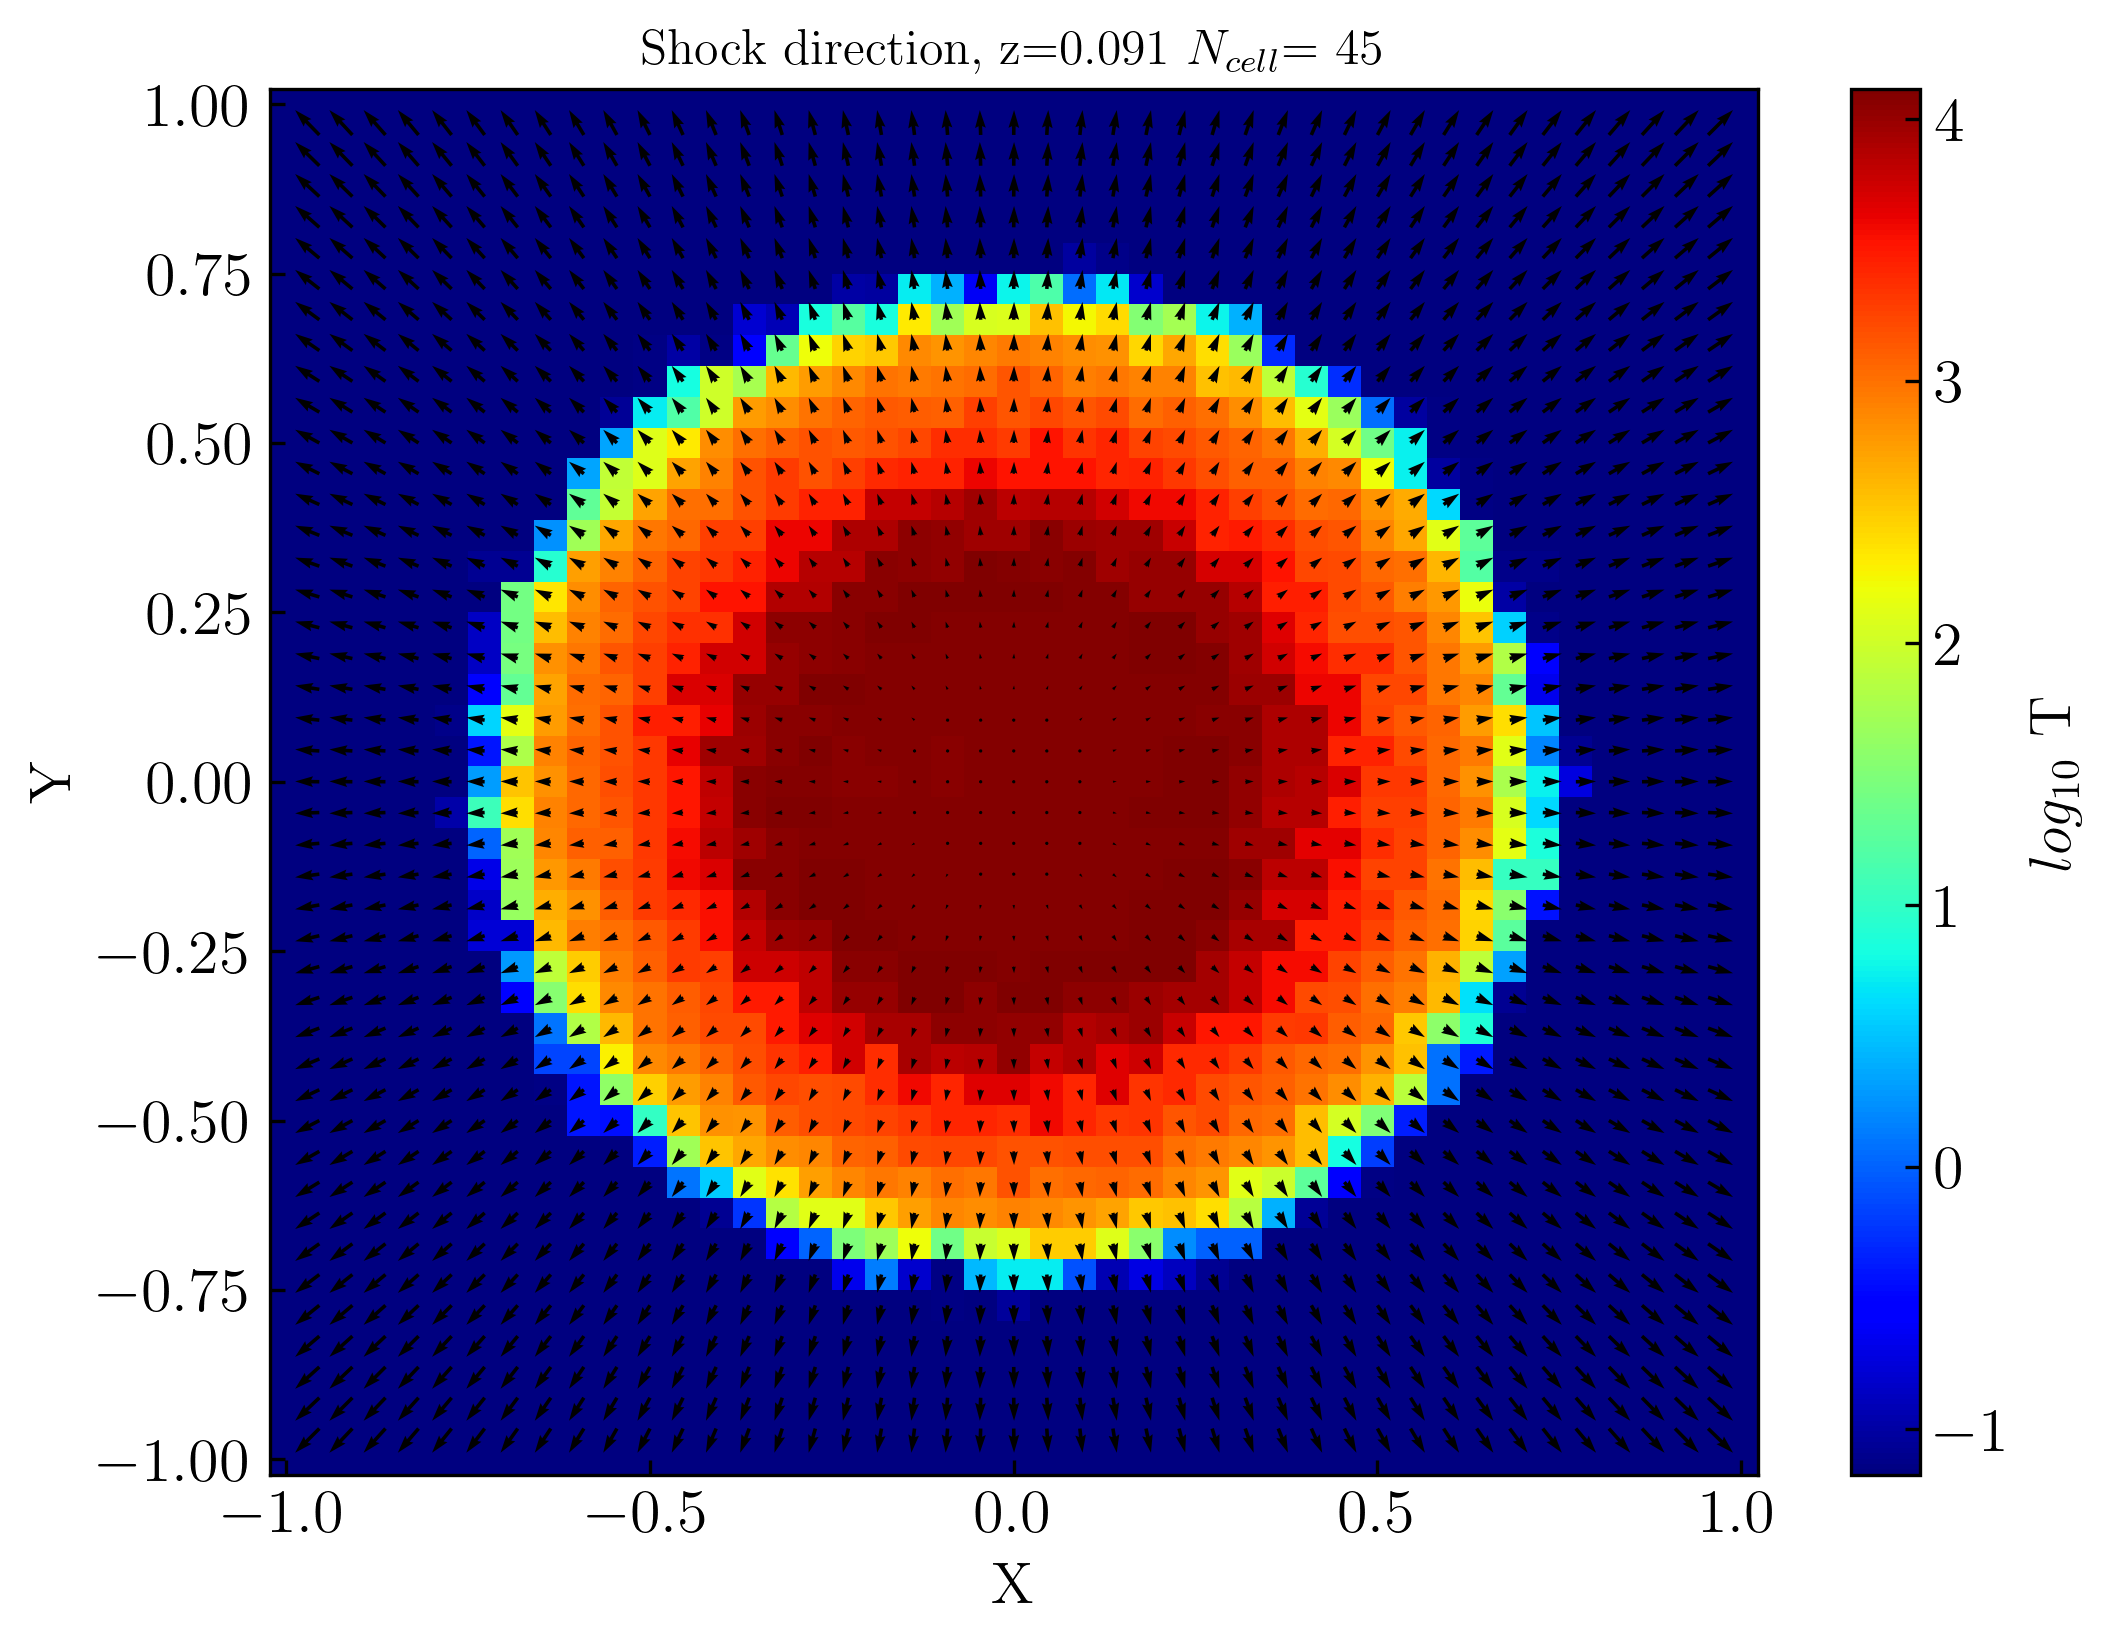

In [25]:
# Shock direciton
z_chosen = np.round(z_radii[idx_slice],3)
fig, ax = plt.subplots(1,1)
ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
img = ax.pcolormesh(x_radii, y_radii, T_plot.T, cmap = 'jet')
cb = plt.colorbar(img)
cb.set_label(r'$log_{10}$ T', fontsize = 14)
ax.quiver(X_cell, Y_cell, postx, posty, color = 'k')# arrow_length_ratio=0.1, color = 'k')
plt.title(f'Shock direction, z={z_chosen} ' + r' $N_{cell}$'+ f'= {num}')
#plt.savefig(f'Figs/shochDir_z{z_chosen}_num{num}.png')